**INSTALLING LIBRARIES**

In [ ]:
!pip install langdetect
!pip install deep-translator
!pip install emoji spacy
!pip install presidio-analyzer presidio-anonymizer spacy
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=904ff088fc706d909f74e7c8d1476e4944d3e2149d3a6160cad5d8364a7e92af
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 4.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Res

**Importing Libraries**

In [ ]:
import pandas as pd
from tqdm import tqdm

**Data Preprocessing - Basic**

In [ ]:
# reading csv file
df=pd.read_csv("combined_emails_with_natural_pii.csv")

In [ ]:
# displaying shape, columns, columns-dtypes
print(f"SHAPE OF THE DATA FRAME : {df.shape}")
print(f"COLUMNS PRESENT IN DATA FRAME : {df.columns}")
print("DATA TYPES FOR COLUMNS")
print(df.dtypes)

SHAPE OF THE DATA FRAME : (24000, 2)
COLUMNS PRESENT IN DATA FRAME : Index(['email', 'type'], dtype='object')
DATA TYPES FOR COLUMNS
email    object
type     object
dtype: object


In [ ]:
# detecting the presence of missing values, duplicate rows
print(f"TOTAL NUMBER OF MISSING VALUES : {df.isna().sum().sum()}")
print("COLUMN WISE NUMBER OF MISSING VALUES")
print(df.isna().sum())
print(f"NUMBER OF DUPLICATE ROWS PRESENT IN DATA FRAME : {df[df.duplicated()].shape}")
print("ACTION ON DROPPING DUPLICATE VALUES")
if df[df.duplicated()].shape[0]>0:
  df=df.drop_duplicates()
  print("ACTION(DROPPED DUPLICATES)")
else:
  print("NO ACTION IS PERFORMED SINCE NO DUPLICATE ROWS FOUND")

TOTAL NUMBER OF MISSING VALUES : 0
COLUMN WISE NUMBER OF MISSING VALUES
email    0
type     0
dtype: int64
NUMBER OF DUPLICATE ROWS PRESENT IN DATA FRAME : (0, 2)
ACTION ON DROPPING DUPLICATE VALUES
NO ACTION IS PERFORMED SINCE NO DUPLICATE ROWS FOUND


In [ ]:
# Number of unique values and unique values present in the column 'type'
print(f"NUMBER OF UNIQUE VALUES IN COLUMN 'type' :{df['type'].nunique()}")
print(f"UNIQUE VALUES PRESENT IN COLUMN 'type' :{list(df['type'].unique())}")

NUMBER OF UNIQUE VALUES IN COLUMN 'type' :4
UNIQUE VALUES PRESENT IN COLUMN 'type' :['Incident', 'Request', 'Problem', 'Change']


In [ ]:
# Checking whether the data set is balanced or not
print("FREQUENCIES FOR EACH UNIQUE VALUE IN COLUMN 'type'")
df['type'].value_counts()

FREQUENCIES FOR EACH UNIQUE VALUE IN COLUMN 'type'


,count
type,
Incident,9586
Request,6860
Problem,5037
Change,2517


In [ ]:
print("THIS IS AN IMBALANCED DATA SET")

THIS IS AN IMBALANCED DATA SET


In [ ]:
# printing a single value from column 'email'
df['email'][0]

'Subject: Unvorhergesehener Absturz der Datenanalyse-Plattform\n\nDie Datenanalyse-Plattform brach unerwartet ab, da die Speicheroberfläche zu gering war My name is Sophia Rossi.. Ich habe versucht, Laravel 8 und meinen MacBook Pro neu zu starten, aber das Problem behält sich bei. Ich benötige Ihre Unterstützung, um diesen Fehler zu beheben. You can reach me at janesmith@company.com.'

In [ ]:
from langdetect import detect

def detect_languages_offline(df):
    language_list = []
    for i in tqdm(df['email'], desc="Detecting emails Language"):
        try:
            language_list.append(detect(i))
        except:
            language_list.append("unknown")

    frequencyDict = {}
    for lang in set(language_list):
        frequencyDict[lang] = language_list.count(lang)

    return frequencyDict

In [ ]:
frequencyDict=detect_languages_offline(df)
print(frequencyDict)

Detecting emails Language: 100%|██████████| 24000/24000 [01:58<00:00, 202.75it/s]

{'es': 812, 'pt': 474, 'nl': 5, 'it': 1, 'de': 6922, 'fr': 484, 'ca': 1, 'en': 15301}


In [ ]:
import pandas as pd
from langdetect import detect
from deep_translator import GoogleTranslator
from tqdm import tqdm

# Translate all non-English emails to English
def translate_languages(df):
    translated_emails = []

    for text in tqdm(df['email'], desc="Translating emails"):
        try:
            detected_lang = detect(text)
            if detected_lang != 'en':
                translated_text = GoogleTranslator(source=detected_lang, target='en').translate(text)
            else:
                translated_text = text
        except Exception as e:
            # Fallback in case of error
            translated_text = text
        translated_emails.append(translated_text)

    df['email'] = translated_emails
    return df

In [ ]:
print("BEFORE TRANSLATION : ")
lang_count=detect_languages_offline(df)
print(lang_count)
df=translate_languages(df)
lang_count=detect_languages_offline(df)
print("AFTER TRANSLATION : ")
print(lang_count)

BEFORE TRANSLATION : 


Detecting emails Language: 100%|██████████| 24000/24000 [01:53<00:00, 210.87it/s]


{'es': 812, 'pt': 474, 'nl': 4, 'de': 6926, 'fr': 485, 'it': 1, 'en': 15298}


Detecting emails Language: 100%|██████████| 24000/24000 [01:49<00:00, 219.38it/s]

AFTER TRANSLATION : 
{'en': 23991, 'nl': 2, 'de': 6, 'fr': 1}


In [ ]:
df.to_csv("modified_csv.csv")

In [ ]:
df['email'][0]

'Subject: unforeseen crash of the data analysis platform\n\nThe data analysis platform broke off unexpectedly because the memory surface was too small My name is sophia rossi .. I tried to start Laravel 8 and my MacBook Pro again, but the problem retains. I need your support to fix this mistake. You Can Reach Me at janesmith@company.com.'

In [ ]:
print("BEFORE TRANSLATION : ")
lang_count=detect_languages_offline(df)
print(lang_count)
df=translate_languages(df)
lang_count=detect_languages_offline(df)
print("AFTER TRANSLATION : ")
print(lang_count)

BEFORE TRANSLATION : 


Detecting emails Language: 100%|██████████| 24000/24000 [01:47<00:00, 224.13it/s]


{'en': 23989, 'nl': 3, 'de': 6, 'fr': 2}


Detecting emails Language: 100%|██████████| 24000/24000 [01:47<00:00, 222.41it/s]

AFTER TRANSLATION : 
{'en': 23999, 'nl': 1}


In [ ]:
df.to_csv("modified(1).csv")

In [ ]:
print("BEFORE TRANSLATION : ")
lang_count=detect_languages_offline(df)
print(lang_count)
df=translate_languages(df)
lang_count=detect_languages_offline(df)
print("AFTER TRANSLATION : ")
print(lang_count)

BEFORE TRANSLATION : 


Detecting emails Language: 100%|██████████| 24000/24000 [01:21<00:00, 295.39it/s]


{'en': 23991, 'nl': 1, 'de': 5, 'fr': 1, 'es': 2}


Detecting emails Language: 100%|██████████| 24000/24000 [01:22<00:00, 291.35it/s]

AFTER TRANSLATION : 
{'fr': 1, 'en': 23999}


In [ ]:
df.to_csv("modified(2).csv")

In [ ]:
df=pd.read_csv("modified(2).csv")

**ADVANCED DATA PREPROCESSING**

In [ ]:
# viewing sample data set with 5 rows
df.sample(5)

,Unnamed: 0,email,type
4380,4380,Subject: Request for Software Assistance\n\nAn...,Incident
7856,7856,Subject: Unauthorized Access to Medical Data D...,Incident
21763,21763,Subject: Urgent: Jira Ticket System Disruption...,Incident
16979,16979,Subject: Request for Details on Salesforce CRM...,Request
6956,6956,Subject: Data Analytics Dashboard Sudden Crash...,Problem


In [ ]:
# dropping the column Unnamed: 0
df=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
# viewing columns
df.columns

Index(['email', 'type'], dtype='object')

In [ ]:
# converting email to lower case
df['email']=df['email'].str.lower()
print("SAMPLE DOCUMENT AFTER LOWER CASING")
df.head(1)

SAMPLE DOCUMENT AFTER LOWER CASING


,email,type
0,subject: unforeseen crash of the data analysis...,Incident


In [ ]:
# Removing html tags, url's, punctuation's and encoding the emoji's if used

In [ ]:
import re
import string
import emoji
import pandas as pd

def clean_email_text(df):
    cleaned_emails = []

    for text in df['masked_email']:
        # 1. Remove HTML tags
        text = re.sub(r'<.*?>', '', text)

        # 2. Remove escape characters (like \n, \t, \r)
        text = re.sub(r'[\n\r\t]', ' ', text)

        # 3. Remove URLs
        text = re.sub(r'http\S+|www\.\S+', '', text)

        # 4. Remove punctuation
        text = ''.join(ch for ch in text if ch not in string.punctuation)

        # 5. Encode emojis (convert emojis to text like ':smile:')
        text = emoji.demojize(text)

        # Optional: Remove multiple spaces
        text = re.sub(r'\s+', ' ', text).strip()

        cleaned_emails.append(text)

    df['email'] = cleaned_emails
    return df

In [ ]:
df=clean_email_text(df)

In [ ]:
df['email'][0]

'subject: unforeseen crash of the data analysis platform the data analysis platform broke off unexpectedly because the memory surface was too small my name is sophia rossi .. i tried to start laravel 8 and my macbook pro again, but the problem retains. i need your support to fix this mistake. you can reach me at janesmith@company.com.'

In [ ]:
from presidio_analyzer import AnalyzerEngine, RecognizerRegistry, PatternRecognizer, Pattern
from presidio_anonymizer import AnonymizerEngine
from tqdm import tqdm
import pandas as pd

# Create analyzer
analyzer = AnalyzerEngine()

# Add custom recognizers (for Aadhar, CVV, Expiry)
aadhar_pattern = Pattern(name="Aadhar Pattern", regex=r"\b\d{4}[\s\-]?\d{4}[\s\-]?\d{4}\b", score=0.85)
cvv_pattern = Pattern(name="CVV Pattern", regex=r"\b\d{3}\b", score=0.8)
expiry_pattern = Pattern(name="Expiry Pattern", regex=r"\b(0[1-9]|1[0-2])/?(\d{2}|\d{4})\b", score=0.8)

aadhar_recognizer = PatternRecognizer(supported_entity="AADHAR_NUM", patterns=[aadhar_pattern])
cvv_recognizer = PatternRecognizer(supported_entity="CVV_NO", patterns=[cvv_pattern])
expiry_recognizer = PatternRecognizer(supported_entity="EXPIRY_NO", patterns=[expiry_pattern])

# Register them
analyzer.registry.add_recognizer(aadhar_recognizer)
analyzer.registry.add_recognizer(cvv_recognizer)
analyzer.registry.add_recognizer(expiry_recognizer)

# Map Presidio entity names to required ones
entity_label_map = {
    "PERSON": "full_name",
    "EMAIL_ADDRESS": "email",
    "PHONE_NUMBER": "phone_number",
    "DATE_TIME": "dob",
    "CREDIT_CARD": "credit_debit_no",
    "AADHAR_NUM": "aadhar_num",
    "CVV_NO": "cvv_no",
    "EXPIRY_NO": "expiry_no"
}

# Function to mask a single email
def mask_email_content(text):
    results = analyzer.analyze(text=text, entities=[], language='en')
    results = sorted(results, key=lambda r: r.start, reverse=True)

    for r in results:
        entity_name = entity_label_map.get(r.entity_type, None)
        if entity_name:
            text = text[:r.start] + f"[{entity_name}]" + text[r.end:]

    return text

In [ ]:
def mask_dataframe_emails(df, text_column='email'):
    tqdm.pandas(desc="Masking PII/PCI with Presidio")
    df['masked_email'] = df[text_column].progress_apply(mask_email_content)
    return df

In [ ]:
df = mask_dataframe_emails(df)

Masking PII/PCI with Presidio: 100%|██████████| 24000/24000 [11:49<00:00, 33.85it/s]


In [ ]:
df['masked_email'][2]

'subject: data analytics for investment i am contacting you to request information on data analytics tools that can be utilized with the eclipse ide for enhancing investment optimization. i am seeking suggestions for tools that can aid in making data-driven decisions. particularly, i am interested in tools that can manage large datasets and offer advanced analytics features. these tools should be compatible with the eclipse ide and can smoothly integrate into my workflow you can reach me at [email].. key features i am interested in include data visualization, predictive modeling, and machine learning capabilities. i would greatly appreciate any recommendations or advice on how to begin with data analytics for investment optimization using the eclipse ide. my name is [full_name].'

In [ ]:
df=clean_email_text(df)

In [ ]:
df['masked_email'][2]

'subject: data analytics for investment i am contacting you to request information on data analytics tools that can be utilized with the eclipse ide for enhancing investment optimization. i am seeking suggestions for tools that can aid in making data-driven decisions. particularly, i am interested in tools that can manage large datasets and offer advanced analytics features. these tools should be compatible with the eclipse ide and can smoothly integrate into my workflow you can reach me at [email].. key features i am interested in include data visualization, predictive modeling, and machine learning capabilities. i would greatly appreciate any recommendations or advice on how to begin with data analytics for investment optimization using the eclipse ide. my name is [full_name].'

In [ ]:
df.columns

Index(['type', 'masked_email'], dtype='object')

In [ ]:
df.to_csv("email.csv")

In [ ]:
df=pd.read_csv("email.csv")
df.columns

Index(['Unnamed: 0', 'type', 'masked_email'], dtype='object')

In [ ]:
df=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df=df.rename({"masked_email":'email'},axis=1)

In [ ]:
df.columns

Index(['type', 'email'], dtype='object')

**SOME NLP TECHNIQUES**

In [ ]:
import spacy
import pandas as pd
from tqdm import tqdm

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

def process_emails(df):
    lemmatized_nostop = []

    for email in tqdm(df['email'], desc="Lemmatizing without stopwords"):
        doc = nlp(email)

        # Lemmatize and remove stopwords + punctuation
        lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
        lemmatized_nostop.append(' '.join(lemmas))

    # Add new column to DataFrame
    df['email_lemmatized_nostopwords'] = lemmatized_nostop

    return df

In [ ]:
df=process_emails(df)

Lemmatizing without stopwords: 100%|██████████| 24000/24000 [09:10<00:00, 43.57it/s]


In [ ]:
df=pd.read_csv("email_lemmatized_nostopwords.csv")

In [ ]:
df=df.drop(['Unnamed: 0', 'email'],axis=1)

In [ ]:
df['email_lemmatized_nostopwords'][2]

'subject data analytic investment contact request information datum analytic tool utilize eclipse ide enhance investment optimization seek suggestion tool aid make data drive decision particularly interested tool manage large dataset offer advanced analytic feature tool compatible eclipse ide smoothly integrate workflow reach email key feature interested include datum visualization predictive modeling machine learning capability greatly appreciate recommendation advice begin data analytic investment optimization eclipse ide full_name'

In [ ]:
df=df.rename({'email_lemmatized_nostopwords':'email'},axis=1)

**Exploratory Data Analysis**

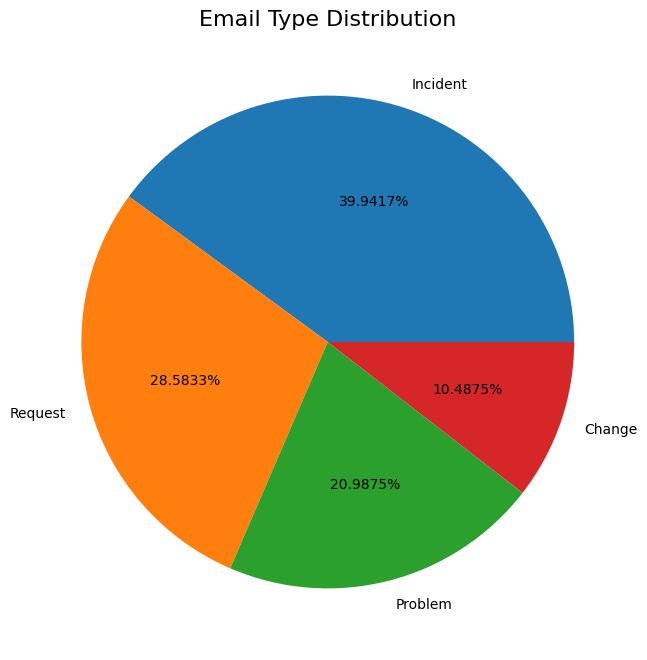

In [ ]:
def format_pct(pct):
    return f"{pct:.4f}%"
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.pie(df['type'].value_counts(),labels=df['type'].unique(),autopct=format_pct)
plt.title("Email Type Distribution", fontsize=16)
plt.show()

In [ ]:
df=df.rename({'email_lemmatized_nostopwords':'email'},axis=1)
df.columns

Index(['type', 'email'], dtype='object')

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud_from_column(df, column='email', title='Word Cloud'):
    # Combine all text in the column
    text = ' '.join(df[column].dropna().astype(str))

    # Generate word cloud
    wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='viridis').generate(text)

    # Plot
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

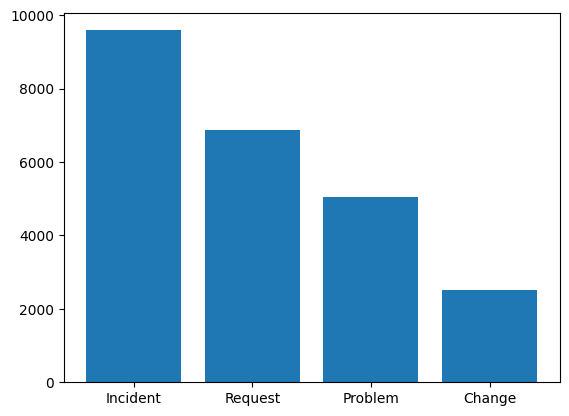

In [ ]:
value_counts=df['type'].value_counts()
labels=value_counts.index
plt.bar(labels,value_counts)
plt.show()

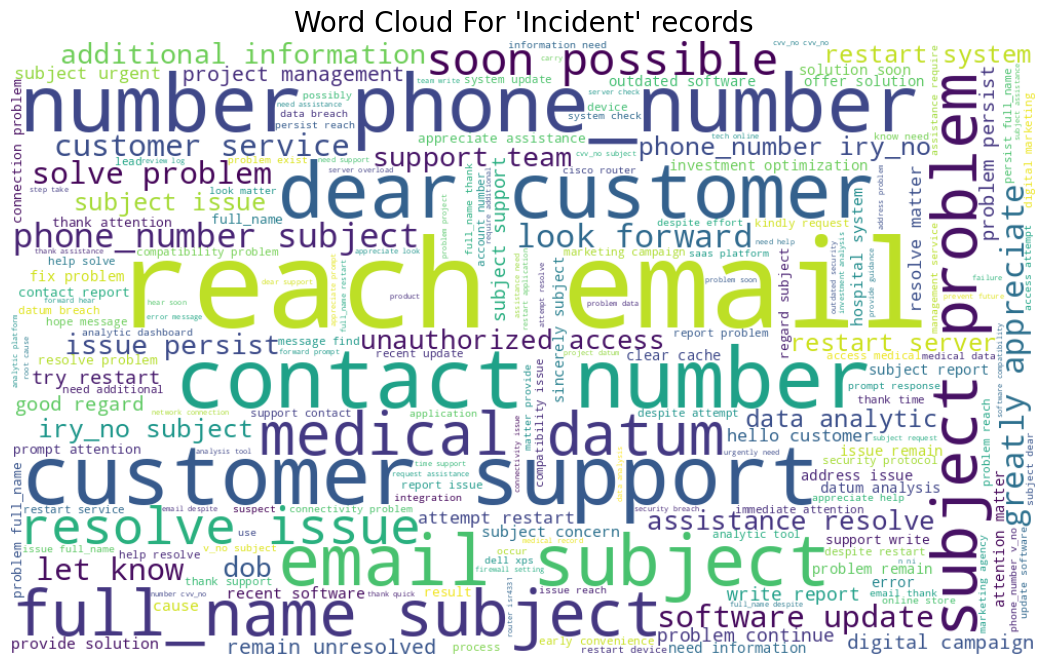

In [ ]:
# Example usage
plot_wordcloud_from_column(df[df['type']=='Incident'],title="Word Cloud For 'Incident' records")

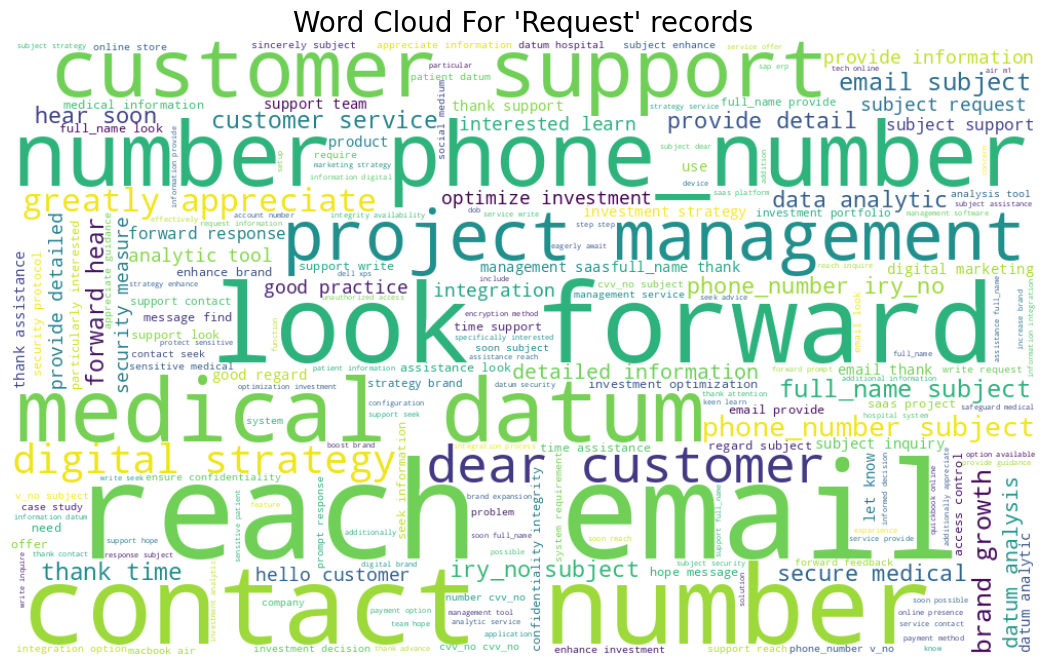

In [ ]:
# Example usage
plot_wordcloud_from_column(df[df['type']=='Request'],title="Word Cloud For 'Request' records")

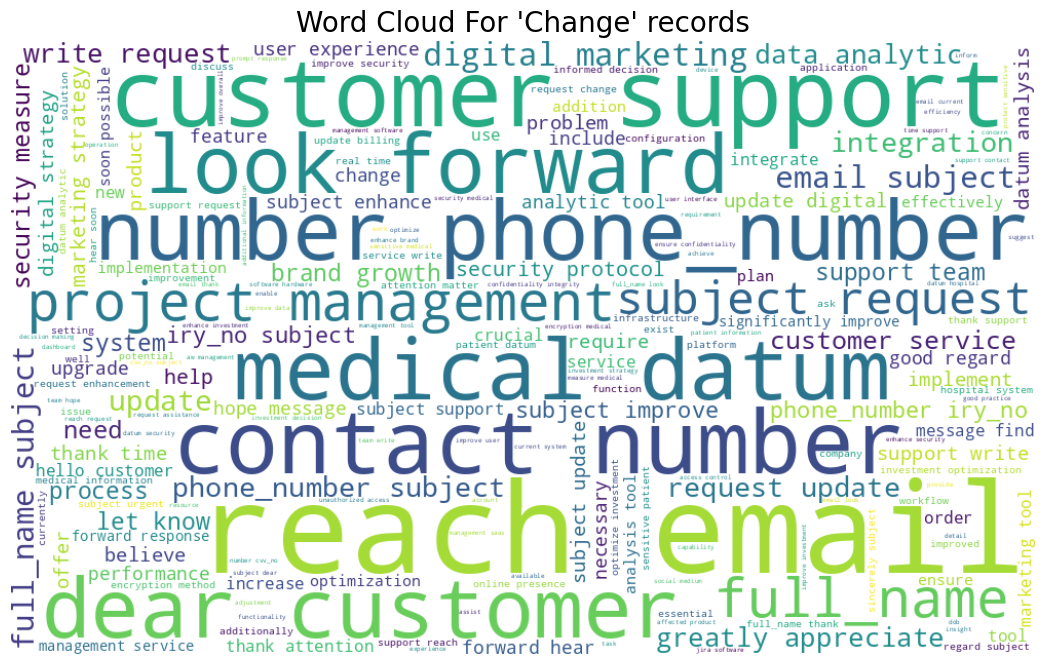

In [ ]:
# Example usage
plot_wordcloud_from_column(df[df['type']=='Change'],title="Word Cloud For 'Change' records")

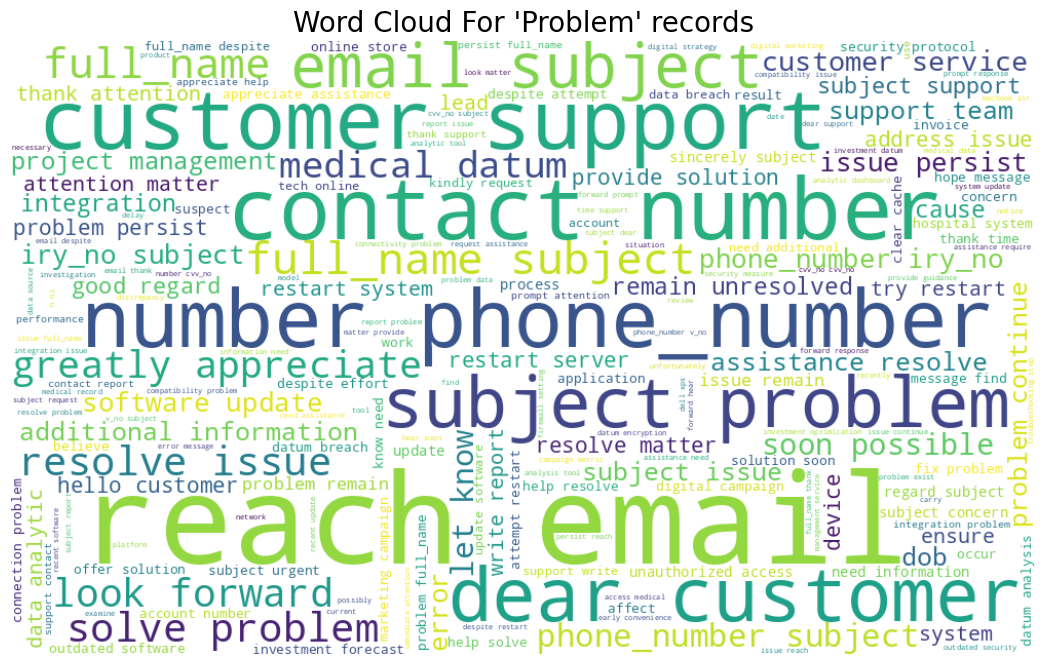

In [ ]:
# Example usage
plot_wordcloud_from_column(df[df['type']=='Problem'],title="Word Cloud For 'Problem' records")

**FEATURE ENGINEERING + MODEL SELECTION + MODEL IMPLEMENTATION + EVALUATION**

In [ ]:
df.columns

Index(['type', 'email'], dtype='object')

**WITH TFIDF VECTORIZER**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import *
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Prepare data
X = df['email']
y = df[['type']]

# Encode target
encoder = OrdinalEncoder()
y_encoded = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded.ravel(), test_size=0.2, random_state=42, stratify=y_encoded
)

In [ ]:
y_encoded[2]

array([3.])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer()
X_train_transformed=vectorizer.fit_transform(X_train)
x_test_transformed=vectorizer.transform(X_test)
model=MultinomialNB()
model.fit(X_train_transformed,y_train)
y_pred = model.predict(x_test_transformed)

print("MultinomialNB")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

MultinomialNB
Accuracy: 0.7072916666666667
              precision    recall  f1-score   support

      Change       0.95      0.36      0.52       504
    Incident       0.64      0.97      0.77      1917
     Problem       0.68      0.10      0.18      1007
     Request       0.81      0.92      0.86      1372

    accuracy                           0.71      4800
   macro avg       0.77      0.59      0.58      4800
weighted avg       0.73      0.71      0.64      4800



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer()
X_train_transformed=vectorizer.fit_transform(X_train)
x_test_transformed=vectorizer.transform(X_test)
model=LogisticRegression(max_iter=1000)
model.fit(X_train_transformed,y_train)
y_pred = model.predict(x_test_transformed)

print("MultinomialNB")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

MultinomialNB
Accuracy: 0.7702083333333334
              precision    recall  f1-score   support

      Change       0.93      0.81      0.87       504
    Incident       0.70      0.86      0.77      1917
     Problem       0.59      0.35      0.44      1007
     Request       0.91      0.94      0.92      1372

    accuracy                           0.77      4800
   macro avg       0.78      0.74      0.75      4800
weighted avg       0.76      0.77      0.76      4800



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X_train, X_test, y_train, y_test, encoder, df are already defined

# Vectorize the training and test data
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train the LinearSVC model
model = LinearSVC()
model.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = model.predict(X_test_transformed)

# Evaluation
print("LinearSVC")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Predict on a new example from the DataFrame
print("PREDICTIONS USING LINEAR SVC")
print(df.head(3))

data = df['email'][100]
print(data)

# Fix: Pass a list of the string directly
need_prediction = vectorizer.transform([data])
prediction = model.predict(need_prediction)
print("Prediction for new email:", prediction[0])

LinearSVC
Accuracy: 0.77625
              precision    recall  f1-score   support

      Change       0.91      0.86      0.89       504
    Incident       0.71      0.84      0.77      1917
     Problem       0.59      0.39      0.47      1007
     Request       0.92      0.94      0.93      1372

    accuracy                           0.78      4800
   macro avg       0.78      0.76      0.76      4800
weighted avg       0.77      0.78      0.76      4800

PREDICTIONS USING LINEAR SVC
       type                                              email
0  Incident  subject unforeseen crash data analysis platfor...
1   Request  subject customer support inquiry seek informat...
2   Request  subject data analytic investment contact reque...
subject different campaign metric dear customer support sign report diversity campaign metric reach email error occur incorrect datum analysis tool extract think api integration error inquiry error check api key query syntax ensure correct error continue i

In [ ]:
y_encoded[100]

array([2.])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X_train, X_test, y_train, y_test, encoder, df are already defined

# Vectorize the training and test data
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = model.predict(X_test_transformed)

# Evaluation
print("RandomForestClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Predict on a new example from the DataFrame
print("PREDICTIONS USING RANDOM FOREST")
print(df.head(3))

data = df['email'][10]
print(data)

# Predict
need_prediction = vectorizer.transform([data])
prediction = model.predict(need_prediction)
print("Prediction for new email:", prediction[0])

if prediction[0]==y_encoded[10]:
  print("=======================================================")
  print("CORRECT CLASSIFICATION")
  print("=======================================================")
else:
  print("=======================================================")
  print("WRONG CLASSIFICATION")
  print("=======================================================")

RandomForestClassifier
Accuracy: 0.78125
              precision    recall  f1-score   support

      Change       0.98      0.69      0.81       504
    Incident       0.68      0.98      0.81      1917
     Problem       0.94      0.22      0.35      1007
     Request       0.89      0.95      0.92      1372

    accuracy                           0.78      4800
   macro avg       0.87      0.71      0.72      4800
weighted avg       0.83      0.78      0.74      4800

PREDICTIONS USING RANDOM FOREST
       type                                              email
0  Incident  subject unforeseen crash data analysis platfor...
1   Request  subject customer support inquiry seek informat...
2   Request  subject data analytic investment contact reque...
subject issue data analytic platform insufficient ram allocation reach report issue data analytic platform platform crash believe inadequate ram allocation full_name try restart server review log problem exist reach email kindly request ass

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X_train, X_test, y_train, y_test, encoder, df, y_encoded are already defined

# Vectorize the training and test data
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train the GradientBoostingClassifier model
model = GradientBoostingClassifier()
model.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = model.predict(X_test_transformed)

# Evaluation
print("GradientBoostingClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Predict on a new example from the DataFrame
print("PREDICTIONS USING GRADIENT BOOSTING")
print(df.head(3))

data = df['email'][0]
print(data)

# Predict
need_prediction = vectorizer.transform([data])
prediction = model.predict(need_prediction)
print("Prediction for new email:", prediction[0])

# Check if prediction is correct
if prediction[0] == y_encoded[0]:
    print("=======================================================")
    print("CORRECT CLASSIFICATION")
    print("=======================================================")
else:
    print("=======================================================")
    print("WRONG CLASSIFICATION")
    print("=======================================================")

GradientBoostingClassifier
Accuracy: 0.740625
              precision    recall  f1-score   support

      Change       0.90      0.73      0.81       504
    Incident       0.66      0.91      0.77      1917
     Problem       0.61      0.17      0.26      1007
     Request       0.86      0.93      0.89      1372

    accuracy                           0.74      4800
   macro avg       0.76      0.68      0.68      4800
weighted avg       0.73      0.74      0.70      4800

PREDICTIONS USING GRADIENT BOOSTING
       type                                              email
0  Incident  subject unforeseen crash data analysis platfor...
1   Request  subject customer support inquiry seek informat...
2   Request  subject data analytic investment contact reque...
subject unforeseen crash data analysis platform data analysis platform break unexpectedly memory surface small full_name try start laravel 8 macbook pro problem retain need support fix mistake reach email
Prediction for new email: 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X_train, X_test, y_train, y_test, encoder, df, y_encoded are already defined

# Vectorize the training and test data
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train the DecisionTreeClassifier model
model = DecisionTreeClassifier()
model.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = model.predict(X_test_transformed)

# Evaluation
print("DecisionTreeClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Predict on a new example from the DataFrame
print("PREDICTIONS USING DECISION TREE")
print(df.head(3))

data = df['email'][10]
print(data)

# Predict
need_prediction = vectorizer.transform([data])
prediction = model.predict(need_prediction)
print("Prediction for new email:", prediction[0])

# Check if prediction is correct
if prediction[0] == y_encoded[10]:
    print("=======================================================")
    print("CORRECT CLASSIFICATION")
    print("=======================================================")
else:
    print("=======================================================")
    print("WRONG CLASSIFICATION")
    print("=======================================================")

DecisionTreeClassifier
Accuracy: 0.693125
              precision    recall  f1-score   support

      Change       0.71      0.69      0.70       504
    Incident       0.69      0.72      0.70      1917
     Problem       0.45      0.41      0.43      1007
     Request       0.86      0.86      0.86      1372

    accuracy                           0.69      4800
   macro avg       0.68      0.67      0.67      4800
weighted avg       0.69      0.69      0.69      4800

PREDICTIONS USING DECISION TREE
       type                                              email
0  Incident  subject unforeseen crash data analysis platfor...
1   Request  subject customer support inquiry seek informat...
2   Request  subject data analytic investment contact reque...
subject issue data analytic platform insufficient ram allocation reach report issue data analytic platform platform crash believe inadequate ram allocation full_name try restart server review log problem exist reach email kindly request as

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X_train, X_test, y_train, y_test, encoder, df, y_encoded are already defined

# Vectorize the training and test data
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train the SGDClassifier model
model = SGDClassifier()
model.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = model.predict(X_test_transformed)

# Evaluation
print("SGDClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Predict on a new example from the DataFrame
print("PREDICTIONS USING SGD CLASSIFIER")
print(df.head(3))

data = df['email'][0]
print(data)

# Predict
need_prediction = vectorizer.transform([data])
prediction = model.predict(need_prediction)
print("Prediction for new email:", prediction[0])

# Check if prediction is correct
if prediction[0] == y_encoded[0]:
    print("=======================================================")
    print("CORRECT CLASSIFICATION")
    print("=======================================================")
else:
    print("=======================================================")
    print("WRONG CLASSIFICATION")
    print("=======================================================")

SGDClassifier
Accuracy: 0.7658333333333334
              precision    recall  f1-score   support

      Change       0.92      0.80      0.86       504
    Incident       0.68      0.93      0.78      1917
     Problem       0.70      0.19      0.30      1007
     Request       0.90      0.94      0.92      1372

    accuracy                           0.77      4800
   macro avg       0.80      0.72      0.71      4800
weighted avg       0.77      0.77      0.73      4800

PREDICTIONS USING SGD CLASSIFIER
       type                                              email
0  Incident  subject unforeseen crash data analysis platfor...
1   Request  subject customer support inquiry seek informat...
2   Request  subject data analytic investment contact reque...
subject unforeseen crash data analysis platform data analysis platform break unexpectedly memory surface small full_name try start laravel 8 macbook pro problem retain need support fix mistake reach email
Prediction for new email: 1.0
CO

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X_train, X_test, y_train, y_test, encoder, df, y_encoded are already defined

# Vectorize the training and test data
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train the RidgeClassifier model
model = RidgeClassifier()
model.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = model.predict(X_test_transformed)

# Evaluation
print("RidgeClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Predict on a new example from the DataFrame
print("PREDICTIONS USING RIDGE CLASSIFIER")
print(df.head(3))

data = df['email'][10]
print(data)

# Predict
need_prediction = vectorizer.transform([data])
prediction = model.predict(need_prediction)
print("Prediction for new email:", prediction[0])

# Check if prediction is correct
if prediction[0] == y_encoded[10]:
    print("=======================================================")
    print("CORRECT CLASSIFICATION")
    print("=======================================================")
else:
    print("=======================================================")
    print("WRONG CLASSIFICATION")
    print("=======================================================")

RidgeClassifier
Accuracy: 0.7702083333333334
              precision    recall  f1-score   support

      Change       0.91      0.80      0.85       504
    Incident       0.70      0.87      0.78      1917
     Problem       0.61      0.34      0.43      1007
     Request       0.90      0.94      0.92      1372

    accuracy                           0.77      4800
   macro avg       0.78      0.74      0.75      4800
weighted avg       0.76      0.77      0.75      4800

PREDICTIONS USING RIDGE CLASSIFIER
       type                                              email
0  Incident  subject unforeseen crash data analysis platfor...
1   Request  subject customer support inquiry seek informat...
2   Request  subject data analytic investment contact reque...
subject issue data analytic platform insufficient ram allocation reach report issue data analytic platform platform crash believe inadequate ram allocation full_name try restart server review log problem exist reach email kindly requ

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X_train, X_test, y_train, y_test, encoder, df, y_encoded are already defined

# Vectorize the training and test data
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train the MLPClassifier model
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = model.predict(X_test_transformed)

# Evaluation
print("MLPClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Predict on a new example from the DataFrame
print("PREDICTIONS USING MLP CLASSIFIER")
print(df.head(3))

data = df['email'][10]
print(data)

# Predict
need_prediction = vectorizer.transform([data])
prediction = model.predict(need_prediction)
print("Prediction for new email:", prediction[0])

# Check if prediction is correct
if prediction[0] == y_encoded[10]:
    print("=======================================================")
    print("CORRECT CLASSIFICATION")
    print("=======================================================")
else:
    print("=======================================================")
    print("WRONG CLASSIFICATION")
    print("=======================================================")

MLPClassifier
Accuracy: 0.79125
              precision    recall  f1-score   support

      Change       0.88      0.86      0.87       504
    Incident       0.78      0.79      0.78      1917
     Problem       0.60      0.56      0.58      1007
     Request       0.91      0.94      0.92      1372

    accuracy                           0.79      4800
   macro avg       0.79      0.79      0.79      4800
weighted avg       0.79      0.79      0.79      4800

PREDICTIONS USING MLP CLASSIFIER
       type                                              email
0  Incident  subject unforeseen crash data analysis platfor...
1   Request  subject customer support inquiry seek informat...
2   Request  subject data analytic investment contact reque...
subject issue data analytic platform insufficient ram allocation reach report issue data analytic platform platform crash believe inadequate ram allocation full_name try restart server review log problem exist reach email kindly request assistance 

**WITH COUNT VECTORIZER**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X_train, X_test, y_train, y_test, encoder, df, y_encoded are already defined

# Vectorize the training and test data
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train the MultinomialNB model
model = MultinomialNB()
model.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = model.predict(X_test_transformed)

# Evaluation
print("MultinomialNB")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Predict on a new example from the DataFrame
print("PREDICTIONS USING MULTINOMIAL NAIVE BAYES")
print(df.head(3))

data = df['email'][0]
print(data)

# Predict
need_prediction = vectorizer.transform([data])
prediction = model.predict(need_prediction)
print("Prediction for new email:", prediction[0])

# Check if prediction is correct
if prediction[0] == y_encoded[0]:
    print("=======================================================")
    print("CORRECT CLASSIFICATION")
    print("=======================================================")
else:
    print("=======================================================")
    print("WRONG CLASSIFICATION")
    print("=======================================================")

MultinomialNB
Accuracy: 0.7316666666666667
              precision    recall  f1-score   support

      Change       0.80      0.75      0.78       504
    Incident       0.72      0.76      0.74      1917
     Problem       0.48      0.45      0.47      1007
     Request       0.91      0.89      0.90      1372

    accuracy                           0.73      4800
   macro avg       0.73      0.71      0.72      4800
weighted avg       0.73      0.73      0.73      4800

PREDICTIONS USING MULTINOMIAL NAIVE BAYES
       type                                              email
0  Incident  subject unforeseen crash data analysis platfor...
1   Request  subject customer support inquiry seek informat...
2   Request  subject data analytic investment contact reque...
subject unforeseen crash data analysis platform data analysis platform break unexpectedly memory surface small full_name try start laravel 8 macbook pro problem retain need support fix mistake reach email
Prediction for new emai

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X_train, X_test, y_train, y_test, encoder, df, y_encoded are already defined

# Vectorize the training and test data
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train the LogisticRegression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = model.predict(X_test_transformed)

# Evaluation
print("LogisticRegression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Predict on a new example from the DataFrame
print("PREDICTIONS USING LOGISTIC REGRESSION")
print(df.head(3))

data = df['email'][10]
print(data)

# Predict
need_prediction = vectorizer.transform([data])
prediction = model.predict(need_prediction)
print("Prediction for new email:", prediction[0])

# Check if prediction is correct
if prediction[0] == y_encoded[10]:
    print("=======================================================")
    print("CORRECT CLASSIFICATION")
    print("=======================================================")
else:
    print("=======================================================")
    print("WRONG CLASSIFICATION")
    print("=======================================================")

LogisticRegression
Accuracy: 0.7691666666666667
              precision    recall  f1-score   support

      Change       0.87      0.84      0.86       504
    Incident       0.73      0.81      0.77      1917
     Problem       0.57      0.44      0.49      1007
     Request       0.91      0.93      0.92      1372

    accuracy                           0.77      4800
   macro avg       0.77      0.75      0.76      4800
weighted avg       0.76      0.77      0.76      4800

PREDICTIONS USING LOGISTIC REGRESSION
       type                                              email
0  Incident  subject unforeseen crash data analysis platfor...
1   Request  subject customer support inquiry seek informat...
2   Request  subject data analytic investment contact reque...
subject issue data analytic platform insufficient ram allocation reach report issue data analytic platform platform crash believe inadequate ram allocation full_name try restart server review log problem exist reach email kindl

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib  # <- for saving model

# Assuming X_train, y_train, X_test, y_test, and encoder are already defined

# Build and train the model
pipeline = make_pipeline(
    CountVectorizer(),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
)
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluation
print("MLPClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Save the pipeline as a .pkl file
joblib.dump(pipeline, "mlp_classifier_pipeline.pkl")
print("Model saved as 'mlp_classifier_pipeline.pkl'")

MLPClassifier
Accuracy: 0.8125
              precision    recall  f1-score   support

      Change       0.88      0.87      0.87       504
    Incident       0.79      0.82      0.80      1917
     Problem       0.65      0.60      0.62      1007
     Request       0.93      0.94      0.94      1372

    accuracy                           0.81      4800
   macro avg       0.81      0.81      0.81      4800
weighted avg       0.81      0.81      0.81      4800

Model saved as 'mlp_classifier_pipeline.pkl'


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X_train, X_test, y_train, y_test, encoder, df, y_encoded are already defined

# Vectorize the training and test data
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train the SGDClassifier model
model = SGDClassifier()
model.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = model.predict(X_test_transformed)

# Evaluation
print("SGDClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Predict on a new example from the DataFrame
print("PREDICTIONS USING SGD CLASSIFIER")
print(df.head(3))

data = df['email'][5]
print(data)

# Predict
need_prediction = vectorizer.transform([data])
prediction = model.predict(need_prediction)
print("Prediction for new email:", prediction[0])

# Check if prediction is correct
if prediction[0] == y_encoded[5]:
    print("=======================================================")
    print("CORRECT CLASSIFICATION")
    print("=======================================================")
else:
    print("=======================================================")
    print("WRONG CLASSIFICATION")
    print("=======================================================")

SGDClassifier
Accuracy: 0.7691666666666667
              precision    recall  f1-score   support

      Change       0.90      0.82      0.86       504
    Incident       0.68      0.93      0.79      1917
     Problem       0.70      0.20      0.32      1007
     Request       0.90      0.94      0.92      1372

    accuracy                           0.77      4800
   macro avg       0.80      0.72      0.72      4800
weighted avg       0.77      0.77      0.73      4800

PREDICTIONS USING SGD CLASSIFIER
       type                                              email
0  Incident  subject unforeseen crash data analysis platfor...
1   Request  subject customer support inquiry seek informat...
2   Request  subject data analytic investment contact reque...
subject concern secure medical datum 2 in-1 convertible laptop norton cvv_no inquire good practice secure medical datum 2 in-1 convertible laptop currently norton cvv_no instal need guidance properly configure protect sensitive medical i

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X_train, X_test, y_train, y_test, encoder, df, y_encoded are already defined

# Vectorize the training and test data
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train the DecisionTreeClassifier model
model = DecisionTreeClassifier()
model.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = model.predict(X_test_transformed)

# Evaluation
print("DecisionTreeClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Predict on a new example from the DataFrame
print("PREDICTIONS USING DECISION TREE")
print(df.head(3))

data = df['email'][10]
print(data)

# Predict
need_prediction = vectorizer.transform([data])
prediction = model.predict(need_prediction)
print("Prediction for new email:", prediction[0])

# Check if prediction is correct
if prediction[0] == y_encoded[10]:
    print("=======================================================")
    print("CORRECT CLASSIFICATION")
    print("=======================================================")
else:
    print("=======================================================")
    print("WRONG CLASSIFICATION")
    print("=======================================================")

DecisionTreeClassifier
Accuracy: 0.706875
              precision    recall  f1-score   support

      Change       0.74      0.69      0.71       504
    Incident       0.70      0.72      0.71      1917
     Problem       0.48      0.46      0.47      1007
     Request       0.86      0.87      0.87      1372

    accuracy                           0.71      4800
   macro avg       0.70      0.69      0.69      4800
weighted avg       0.70      0.71      0.71      4800

PREDICTIONS USING DECISION TREE
       type                                              email
0  Incident  subject unforeseen crash data analysis platfor...
1   Request  subject customer support inquiry seek informat...
2   Request  subject data analytic investment contact reque...
subject issue data analytic platform insufficient ram allocation reach report issue data analytic platform platform crash believe inadequate ram allocation full_name try restart server review log problem exist reach email kindly request as

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X_train, X_test, y_train, y_test, encoder, df, y_encoded are already defined

# Vectorize the training and test data
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train the GradientBoostingClassifier model
model = GradientBoostingClassifier()
model.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = model.predict(X_test_transformed)

# Evaluation
print("GradientBoostingClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Predict on a new example from the DataFrame
print("PREDICTIONS USING GRADIENT BOOSTING")
print(df.head(3))

data = df['email'][10]
print(data)

# Predict
need_prediction = vectorizer.transform([data])
prediction = model.predict(need_prediction)
print("Prediction for new email:", prediction[0])

# Check if prediction is correct
if prediction[0] == y_encoded[10]:
    print("=======================================================")
    print("CORRECT CLASSIFICATION")
    print("=======================================================")
else:
    print("=======================================================")
    print("WRONG CLASSIFICATION")
    print("=======================================================")

GradientBoostingClassifier
Accuracy: 0.7429166666666667
              precision    recall  f1-score   support

      Change       0.90      0.71      0.79       504
    Incident       0.66      0.93      0.77      1917
     Problem       0.65      0.17      0.26      1007
     Request       0.86      0.92      0.89      1372

    accuracy                           0.74      4800
   macro avg       0.77      0.68      0.68      4800
weighted avg       0.74      0.74      0.70      4800

PREDICTIONS USING GRADIENT BOOSTING
       type                                              email
0  Incident  subject unforeseen crash data analysis platfor...
1   Request  subject customer support inquiry seek informat...
2   Request  subject data analytic investment contact reque...
subject issue data analytic platform insufficient ram allocation reach report issue data analytic platform platform crash believe inadequate ram allocation full_name try restart server review log problem exist reach email

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X_train, X_test, y_train, y_test, encoder, df, y_encoded are already defined

# Vectorize the training and test data
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = model.predict(X_test_transformed)

# Evaluation
print("RandomForestClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Predict on a new example from the DataFrame
print("PREDICTIONS USING RANDOM FOREST")
print(df.head(3))

data = df['email'][10]
print(data)

# Predict
need_prediction = vectorizer.transform([data])
prediction = model.predict(need_prediction)
print("Prediction for new email:", prediction[0])

# Check if prediction is correct
if prediction[0] == y_encoded[10]:
    print("=======================================================")
    print("CORRECT CLASSIFICATION")
    print("=======================================================")
else:
    print("=======================================================")
    print("WRONG CLASSIFICATION")
    print("=======================================================")

RandomForestClassifier
Accuracy: 0.7897916666666667
              precision    recall  f1-score   support

      Change       0.98      0.72      0.83       504
    Incident       0.69      0.98      0.81      1917
     Problem       0.94      0.25      0.39      1007
     Request       0.90      0.95      0.92      1372

    accuracy                           0.79      4800
   macro avg       0.88      0.72      0.74      4800
weighted avg       0.83      0.79      0.76      4800

PREDICTIONS USING RANDOM FOREST
       type                                              email
0  Incident  subject unforeseen crash data analysis platfor...
1   Request  subject customer support inquiry seek informat...
2   Request  subject data analytic investment contact reque...
subject issue data analytic platform insufficient ram allocation reach report issue data analytic platform platform crash believe inadequate ram allocation full_name try restart server review log problem exist reach email kindly 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X_train, X_test, y_train, y_test, encoder, df, y_encoded are already defined

# Vectorize the training and test data
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Train the LinearSVC model
model = LinearSVC()
model.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = model.predict(X_test_transformed)

# Evaluation
print("LinearSVC")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# Predict on a new example from the DataFrame
print("PREDICTIONS USING LINEAR SVC")
print(df.head(3))

data = df['email'][10]
print(data)

# Predict
need_prediction = vectorizer.transform([data])
prediction = model.predict(need_prediction)
print("Prediction for new email:", prediction[0])

# Check if prediction is correct
if prediction[0] == y_encoded[10]:
    print("=======================================================")
    print("CORRECT CLASSIFICATION")
    print("=======================================================")
else:
    print("=======================================================")
    print("WRONG CLASSIFICATION")
    print("=======================================================")

LinearSVC
Accuracy: 0.7647916666666666
              precision    recall  f1-score   support

      Change       0.86      0.87      0.87       504
    Incident       0.73      0.79      0.76      1917
     Problem       0.55      0.44      0.49      1007
     Request       0.91      0.93      0.92      1372

    accuracy                           0.76      4800
   macro avg       0.76      0.76      0.76      4800
weighted avg       0.76      0.76      0.76      4800

PREDICTIONS USING LINEAR SVC
       type                                              email
0  Incident  subject unforeseen crash data analysis platfor...
1   Request  subject customer support inquiry seek informat...
2   Request  subject data analytic investment contact reque...
subject issue data analytic platform insufficient ram allocation reach report issue data analytic platform platform crash believe inadequate ram allocation full_name try restart server review log problem exist reach email kindly request assistan

**USING SOME AUTOMATED MACHINE LEARNING FRAMEWORKS**

In [ ]:
# using pycaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 100.6 MB/s eta 0:00:00
   ━━━━

In [ ]:
from pycaret.classification import *
exp = setup(data=df,target='type',text_features=['email'],preprocess=True)

,Description,Value
0,Session id,5294
1,Target,type
2,Target type,Multiclass
3,Target mapping,"Change: 0, Incident: 1, Problem: 2, Request: 3"
4,Original data shape,"(24000, 2)"
5,Transformed data shape,"(24000, 6145)"
6,Transformed train set shape,"(16800, 6145)"
7,Transformed test set shape,"(7200, 6145)"
8,Text features,1
9,Preprocess,True


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7888,0.9457,0.7888,0.8313,0.7554,0.6835,0.7153,64.0380
lightgbm,Light Gradient Boosting Machine,0.7808,0.9262,0.7808,0.7740,0.7670,0.6799,0.6883,76.2000
xgboost,Extreme Gradient Boosting,0.7775,0.9230,0.7775,0.7714,0.7610,0.6740,0.6843,233.9540
rf,Random Forest Classifier,0.7667,0.9313,0.7667,0.8074,0.7236,0.6486,0.6850,36.9110
ridge,Ridge Classifier,0.7654,0.0000,0.7654,0.7567,0.7502,0.6571,0.6657,28.9720
svm,SVM - Linear Kernel,0.7644,0.0000,0.7644,0.7606,0.7355,0.6517,0.6710,18.4480
lr,Logistic Regression,0.7640,0.0000,0.7640,0.7554,0.7485,0.6547,0.6637,42.2880
knn,K Neighbors Classifier,0.7483,0.9040,0.7483,0.7405,0.7392,0.6356,0.6392,30.4030
gbc,Gradient Boosting Classifier,0.7365,0.0000,0.7365,0.7283,0.7009,0.6081,0.6304,451.3590
lda,Linear Discriminant Analysis,0.7342,0.0000,0.7342,0.7306,0.7319,0.6203,0.6207,316.7260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# saving the model
save_model("et","Extra Trees Classifier")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
    

In [ ]:
df['type'][500]

'Request'

In [ ]:
data=pd.DataFrame(data=[df['email'][500]],columns=["email"])
df1=predict_model(best_model,data=data)
final_output=df1['prediction_label'].values[0]
print(final_output)

Request


In [ ]:
ensemble_model=tune_model(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:06:25
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7417,0.8678,0.7417,0.7401,0.7406,0.6340,0.6341
1,0.7071,0.8676,0.7071,0.7058,0.7061,0.5860,0.5862
2,0.6905,0.8626,0.6905,0.6897,0.6894,0.5629,0.5631
3,0.6976,0.8605,0.6976,0.7007,0.6983,0.5746,0.5751
4,0.6923,0.8637,0.6923,0.6998,0.6949,0.5666,0.5670
5,0.6970,0.8598,0.6970,0.6959,0.6959,0.5714,0.5716
6,0.6792,0.8632,0.6792,0.6812,0.6795,0.5480,0.5483
7,0.6726,0.8600,0.6726,0.6838,0.6768,0.5402,0.5410
8,0.7018,0.8653,0.7018,0.7121,0.7053,0.5821,0.5832


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle

# 🧠 Load the dataset
df = pd.read_csv("email_lemmatized_nostopwords.csv")  # Replace with your actual CSV
X = df['email_lemmatized_nostopwords']
y = df[['type']]  # Make y 2D for OrdinalEncoder

# 📊 Encode labels
encoder = OrdinalEncoder()
y_encoded = encoder.fit_transform(y)

# 🧪 Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 🔡 Vectorize text with TF-IDF
vectorizer = CountVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 🧪 Robust Scaler (apply after converting sparse matrix to dense)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_tfidf.toarray())
X_test_scaled = scaler.transform(X_test_tfidf.toarray())

# 🌲 Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train.ravel())

# 📈 Evaluation
y_pred = model.predict(X_test_scaled)
print("RandomForestClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

# 🎯 Test prediction on a sample
print("PREDICTIONS USING RANDOM FOREST")
print(df.head(3))

sample_email = df['email'][10]
sample_vectorized = vectorizer.transform([sample_email])
sample_scaled = scaler.transform(sample_vectorized.toarray())
prediction = model.predict(sample_scaled)

print("Prediction for new email:", prediction[0])
print("Actual label:", y_encoded[10][0])

if prediction[0] == y_encoded[10][0]:
    print("✅ CORRECT CLASSIFICATION")
else:
    print("❌ WRONG CLASSIFICATION")

# 💾 Save model, vectorizer, scaler, and encoder as .pkl
with open("model1.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

with open("encoder.pkl", "wb") as enc_file:
    pickle.dump(encoder, enc_file)

RandomForestClassifier
Accuracy: 0.7908333333333334
              precision    recall  f1-score   support

      Change       0.98      0.71      0.82       479
    Incident       0.69      0.98      0.81      1920
     Problem       0.94      0.24      0.39      1009
     Request       0.90      0.95      0.93      1392

    accuracy                           0.79      4800
   macro avg       0.88      0.72      0.74      4800
weighted avg       0.83      0.79      0.76      4800

PREDICTIONS USING RANDOM FOREST
   Unnamed: 0      type                                              email  \
0           0  Incident  subject: unforeseen crash of the data analysis...   
1           1   Request  subject: customer support inquiry seeking info...   
2           2   Request  subject: data analytics for investment i am co...   

                        email_lemmatized_nostopwords  
0  subject unforeseen crash data analysis platfor...  
1  subject customer support inquiry seek informat...  
2  